In [1]:
input00 = open("input00.txt").readlines()

In [2]:
print(input00)
numTrainingData, numFeatures = (int(s) for s in input00[0].split())

['4500 23\n', 'Nt8FJ +1 1:12087620705283 2:4.797982 3:1 4:4.990433 5:6.492240 6:80.000000 7:0.000000 8:0.000000 9:0 10:0 11:3.850148 12:0 13:1 14:0 15:0 16:1 17:1 18:0 19:0 20:14 21:4.653960 22:0.000000 23:0.000000\n', 'VCaTF +1 1:282114466020 2:3.151926 3:1 4:3.737670 5:3.891820 6:83.000000 7:0.000000 8:0.000000 9:1 10:0 11:2.564949 12:0 13:1 14:0 15:0 16:1 17:0 18:0 19:0 20:2 21:2.890372 22:0.000000 23:0.000000\n', 'gParY +1 1:173284955 2:1.785813 3:1 4:1.791759 5:1.945910 6:0.000000 7:0.000000 8:0.000000 9:0 10:0 11:4.262680 12:2 13:1 14:0 15:0 16:1 17:0 18:0 19:0 20:6 21:3.637586 22:0.000000 23:0.000000\n', 'DtWDw +1 1:4708728355523 2:2.394989 3:1 4:3.091042 5:2.890372 6:0.000000 7:0.000000 8:0.000000 9:0 10:0 11:4.804021 12:8 13:1 14:0 15:0 16:1 17:1 18:0 19:0 20:5 21:2.772589 22:0.000000 23:0.000000\n', '4hUov +1 1:1459162488 2:2.002920 3:1 4:4.836282 5:4.158883 6:0.000000 7:0.000000 8:0.000000 9:0 10:0 11:4.521789 12:10 13:1 14:0 15:0 16:1 17:0 18:0 19:0 20:7 21:2.397895 22:0.00

In [3]:
print(numTrainingData)

4500


In [4]:
print(numFeatures)

23


In [5]:
import numpy as np
trainingFeatures = np.zeros(shape=(numTrainingData, numFeatures))
trainingAnswers = np.zeros(shape=(numTrainingData,))

In [6]:
print(numFeatures)

23


In [7]:
print(trainingFeatures)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [13]:
inputFeatures = input00[1:numTrainingData+1]
print(inputFeatures)

['Nt8FJ +1 1:12087620705283 2:4.797982 3:1 4:4.990433 5:6.492240 6:80.000000 7:0.000000 8:0.000000 9:0 10:0 11:3.850148 12:0 13:1 14:0 15:0 16:1 17:1 18:0 19:0 20:14 21:4.653960 22:0.000000 23:0.000000\n', 'VCaTF +1 1:282114466020 2:3.151926 3:1 4:3.737670 5:3.891820 6:83.000000 7:0.000000 8:0.000000 9:1 10:0 11:2.564949 12:0 13:1 14:0 15:0 16:1 17:0 18:0 19:0 20:2 21:2.890372 22:0.000000 23:0.000000\n', 'gParY +1 1:173284955 2:1.785813 3:1 4:1.791759 5:1.945910 6:0.000000 7:0.000000 8:0.000000 9:0 10:0 11:4.262680 12:2 13:1 14:0 15:0 16:1 17:0 18:0 19:0 20:6 21:3.637586 22:0.000000 23:0.000000\n', 'DtWDw +1 1:4708728355523 2:2.394989 3:1 4:3.091042 5:2.890372 6:0.000000 7:0.000000 8:0.000000 9:0 10:0 11:4.804021 12:8 13:1 14:0 15:0 16:1 17:1 18:0 19:0 20:5 21:2.772589 22:0.000000 23:0.000000\n', '4hUov +1 1:1459162488 2:2.002920 3:1 4:4.836282 5:4.158883 6:0.000000 7:0.000000 8:0.000000 9:0 10:0 11:4.521789 12:10 13:1 14:0 15:0 16:1 17:0 18:0 19:0 20:7 21:2.397895 22:0.000000 23:0.000

In [15]:
len(inputFeatures)

4500

In [16]:
for entryNum in range(trainingFeatures.shape[0]):
    entry = inputFeatures[entryNum].split()
    print(entry)
    trainingAnswers[entryNum] = float(entry[1])
    params = [entry[i] for i in range(2, numFeatures + 2)]
    cleanedParams = [param[param.index(":") + 1:] for param in params]
    trainingFeatures[entryNum] = np.array([float(param) for param in cleanedParams])

['Nt8FJ', '+1', '1:12087620705283', '2:4.797982', '3:1', '4:4.990433', '5:6.492240', '6:80.000000', '7:0.000000', '8:0.000000', '9:0', '10:0', '11:3.850148', '12:0', '13:1', '14:0', '15:0', '16:1', '17:1', '18:0', '19:0', '20:14', '21:4.653960', '22:0.000000', '23:0.000000']
['VCaTF', '+1', '1:282114466020', '2:3.151926', '3:1', '4:3.737670', '5:3.891820', '6:83.000000', '7:0.000000', '8:0.000000', '9:1', '10:0', '11:2.564949', '12:0', '13:1', '14:0', '15:0', '16:1', '17:0', '18:0', '19:0', '20:2', '21:2.890372', '22:0.000000', '23:0.000000']
['gParY', '+1', '1:173284955', '2:1.785813', '3:1', '4:1.791759', '5:1.945910', '6:0.000000', '7:0.000000', '8:0.000000', '9:0', '10:0', '11:4.262680', '12:2', '13:1', '14:0', '15:0', '16:1', '17:0', '18:0', '19:0', '20:6', '21:3.637586', '22:0.000000', '23:0.000000']
['DtWDw', '+1', '1:4708728355523', '2:2.394989', '3:1', '4:3.091042', '5:2.890372', '6:0.000000', '7:0.000000', '8:0.000000', '9:0', '10:0', '11:4.804021', '12:8', '13:1', '14:0', '1

In [17]:
print(trainingFeatures)

[[  1.20876207e+13   4.79798200e+00   1.00000000e+00 ...,   4.65396000e+00
    0.00000000e+00   0.00000000e+00]
 [  2.82114466e+11   3.15192600e+00   1.00000000e+00 ...,   2.89037200e+00
    0.00000000e+00   0.00000000e+00]
 [  1.73284955e+08   1.78581300e+00   1.00000000e+00 ...,   3.63758600e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  3.13630709e+10   0.00000000e+00   1.00000000e+00 ...,   1.38629400e+00
    0.00000000e+00   0.00000000e+00]
 [  2.44858151e+11   1.33327700e+00   1.00000000e+00 ...,   3.17805400e+00
    0.00000000e+00   0.00000000e+00]
 [  2.05221716e+11   1.94054800e+00   1.00000000e+00 ...,   4.30406500e+00
    0.00000000e+00   0.00000000e+00]]


In [18]:
print(trainingAnswers)

[ 1.  1.  1. ..., -1. -1.  1.]


In [21]:
numTestData = int(input00[numTrainingData+1])
print(numTestData)

500


In [22]:
testFeatures = np.zeros(shape=(numTestData, numFeatures))
testNames = []

In [23]:
inputTestFeatures = input00[numTrainingData+2:numTrainingData+2+numTestData]
print(inputTestFeatures)

['3rCWr 1:43914462843 2:1.847511 3:1 4:1.098612 5:1.945910 6:34.285714 7:0.000000 8:0.000000 9:0 10:0 11:2.484907 12:1 13:1 14:0 15:0 16:0 17:0 18:1 19:0 20:46 21:4.905275 22:0.000000 23:0.000000\n', 'snInN 1:397593880864 2:0.000000 3:1 4:5.513429 5:4.521789 6:0.000000 7:0.000000 8:0.000000 9:0 10:0 11:3.465736 12:1 13:1 14:0 15:1 16:0 17:1 18:0 19:0 20:2 21:2.833213 22:0.000000 23:0.000000\n', 'ibfT7 1:61351970470 2:0.000000 3:1 4:4.852030 5:4.094345 6:82.000000 7:0.000000 8:0.000000 9:0 10:0 11:2.564949 12:0 13:1 14:0 15:0 16:0 17:0 18:0 19:0 20:0 21:2.079442 22:0.000000 23:0.000000\n', 'IcbKR 1:889350088 2:3.683381 3:1 4:5.023881 5:5.308268 6:70.000000 7:0.000000 8:0.000000 9:0 10:0 11:4.110874 12:2 13:0 14:0 15:0 16:1 17:0 18:0 19:0 20:4 21:2.772589 22:0.000000 23:0.000000\n', 'SIXmF 1:146985374 2:1.801665 3:1 4:3.970292 5:4.418841 6:0.000000 7:0.000000 8:0.000000 9:0 10:0 11:3.135494 12:0 13:1 14:0 15:0 16:1 17:0 18:0 19:0 20:4 21:2.890372 22:0.000000 23:0.000000\n', 'dLCdh 1:4972

In [24]:
len(inputTestFeatures)

500

In [26]:
for entryNum in range(testFeatures.shape[0]):
    entry = inputTestFeatures[entryNum].split()
    testNames.append(entry[0])
    params = [entry[i] for i in range(1, numFeatures + 1)]
    cleanedParams = [param[param.index(":") + 1:] for param in params]
    testFeatures[entryNum] = np.array([float(param) for param in cleanedParams])

In [31]:
print(testFeatures)

[[  4.39144628e+10   1.84751100e+00   1.00000000e+00 ...,   4.90527500e+00
    0.00000000e+00   0.00000000e+00]
 [  3.97593881e+11   0.00000000e+00   1.00000000e+00 ...,   2.83321300e+00
    0.00000000e+00   0.00000000e+00]
 [  6.13519705e+10   0.00000000e+00   1.00000000e+00 ...,   2.07944200e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  9.95858437e+12   1.87247500e+00   1.00000000e+00 ...,   3.40119700e+00
    0.00000000e+00   0.00000000e+00]
 [  5.80257742e+11   1.31275600e+00   1.00000000e+00 ...,   1.79175900e+00
    0.00000000e+00   0.00000000e+00]
 [  6.12324862e+09   0.00000000e+00   1.00000000e+00 ...,   2.48490700e+00
    0.00000000e+00   0.00000000e+00]]


In [32]:
print(testNames)

['3rCWr', 'snInN', 'ibfT7', 'IcbKR', 'SIXmF', 'dLCdh', 'ziFJ8', '1WtTD', '9uIKh', 'df4Mc', '3nxpY', 'aesmq', 'MyTDz', 'TDMhx', 'Y0rW3', 'KCcKf', '2cz5M', 'kqIJj', 'C1Sg2', 'VAmIt', 'ku9j1', 'TjHRV', 'sq8Xj', 'uKzm4', '3at4H', '8nXGS', '4x8ij', 'PeMnA', 'UUPpU', 'HQ4lZ', 'lEv01', 'XCY52', 'FNoY7', 'JJbco', 'PHQ7z', 'Xejsj', 'A4IsT', '7cU9R', '8mSRL', 'jRMuo', 'dljxu', 'wZyoj', 'us2ca', 'EVenw', 'QLseT', 'lanI5', 'RF9di', '3e6Aa', 'W5mvO', 'LkKbu', 'gbus8', 'LN4W4', '9FNA4', 'rd3qM', 'pV8eI', '5wnO7', '03KFY', 'i25BS', 'AziH8', 'YyCpz', 'qLfPb', 'CJBeL', 'EaAPx', 'sQDFf', 'CELfn', 'Ac6Hy', 'ULryN', 'qCBAx', 'Hoz2c', '8kLbb', 'KAWwb', 'lNMTe', 'MzTHU', 'Sq8XV', 's8ZUG', 'lDcDx', 'xZoGD', 'vHLAR', 'Ag2kt', 'baqkE', 'Hsbs2', 'BlvEz', 'CJqsS', 'vbzII', 'R16fw', 'IxBjS', 'yJl2b', 'RXdcX', 'T7uzV', 'ccZGw', 'f9xFZ', 'dO9iE', '2TaN2', 'a1XoY', '1xXiG', 'a8kZK', 'mXe41', '8NfbF', 'Sqdti', 'gnCsH', 'YGNBE', 'zOA3j', 'b3Cm5', 'Wjo2X', 'IcuwU', 'FyieE', '5OUK8', 'SjCvq', 'kKVUa', 'CEVSg', 'F2MAp', 

In [93]:
content = open("output00.txt").readlines()
content = [line.strip('\n') for line in content]
cleanedContent = [entry[entry.index(" ") + 1:] for entry in content]

testAnswers = np.array([float(s) for s in cleanedContent])

In [94]:
print(testAnswers)

[ 1. -1. -1.  1.  1.  1. -1. -1.  1. -1. -1.  1.  1.  1.  1.  1. -1. -1.
  1. -1.  1.  1. -1.  1.  1.  1.  1. -1. -1.  1.  1. -1.  1. -1.  1.  1.
 -1. -1. -1. -1.  1. -1.  1. -1.  1.  1.  1. -1. -1. -1. -1. -1. -1.  1.
 -1. -1. -1.  1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.
 -1. -1. -1.  1.  1.  1.  1.  1. -1. -1. -1.  1. -1.  1. -1.  1.  1.  1.
 -1. -1.  1. -1. -1. -1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1. -1.
  1.  1. -1.  1.  1.  1. -1. -1. -1.  1. -1.  1. -1.  1.  1.  1.  1. -1.
  1. -1. -1.  1.  1.  1. -1. -1.  1. -1.  1.  1. -1.  1.  1.  1.  1.  1.
 -1. -1. -1. -1.  1. -1. -1. -1. -1. -1.  1.  1.  1. -1. -1.  1.  1.  1.
 -1. -1. -1. -1.  1.  1. -1. -1. -1. -1. -1.  1. -1. -1.  1. -1.  1.  1.
  1. -1. -1.  1. -1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1. -1. -1.
  1.  1. -1.  1.  1. -1. -1. -1. -1.  1.  1. -1. -1.  1. -1. -1.  1. -1.
 -1. -1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1.
  1. -1. -1.  1.  1. -1.  1.  1.  1.  1.  1.  1. -1

In [44]:
trainingFeatures[:,1].T

array([ 4.797982,  3.151926,  1.785813, ...,  0.      ,  1.333277,
        1.940548])

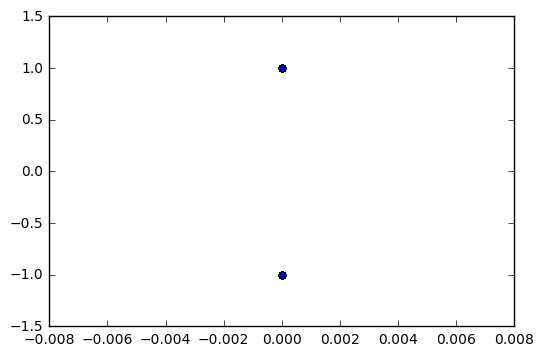

In [196]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
ax.scatter(trainingFeatures[:,22].T, trainingAnswers,  alpha=.1)
plt.show()

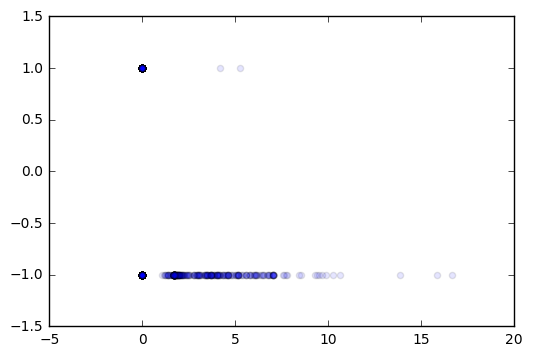

In [76]:
fig, ax = plt.subplots()
ax.scatter(trainingFeatures[:,7].T, trainingAnswers, alpha=.1)
plt.show()

In [25]:
from sklearn import linear_model
logit = linear_model.LogisticRegression()

In [168]:
trainingSlice = trainingFeatures[:, [1]]
logit.fit(trainingSlice, trainingAnswers)
testingSlice = testFeatures[:, [1]]
predictions = logit.predict(testingSlice)

In [172]:
logit.score(testFeatures[:, [1]],testAnswers)

0.78000000000000003

In [169]:
predictProbs = logit.predict_proba(testingSlice)

In [186]:
newPredictions = np.zeros(testAnswers.shape)
for num, prediction in enumerate(predictions):
    if testFeatures[num][7] > 0 or testFeatures[num][6] > 0 or testFeatures[num][13] > 0:
        print("yes")
        newPredictions[num] = -1
    else:
        newPredictions[num] = predictions[num]

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


In [141]:
print(np.mean( predictions != testAnswers ))

0.22


In [187]:
print(np.mean( newPredictions != testAnswers ))

0.188
